<h1>Face Recognition</h1>

<b>Objective:</b>
<p>In this hands-on project, the goal is to build a face identification model to recognize faces.</p>
<br>
<b>Dataset:</b> 
<p>Aligned Face Dataset from Pinterest This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and aligned using dlib library.</p>
<br>
<b>Overview:</b>
<p>In this problem, we use a pre-trained model trained on Face recognition to recognize similar faces. Here, we are particularly interested in recognizing whether two given faces are of the same person or not. Below are the steps involved in the project.</p>

<h2>Mounting the Drive and Extracting the images from the Drive</h2>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.chdir('C:\\Users\\Srivatsa\\Desktop\\Great_Lakes\\Projects\\Computer Vision')

In [5]:
from zipfile import ZipFile
with ZipFile('Aligned Face Dataset from Pinterest.zip', 'r') as zipObj:
  zipObj.extractall()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Srivatsa\\Desktop\\Great_Lakes\\Projects\\Computer Vision\\PINS\\pins_Natalie Portman \\Natalie Portman 0.jpg'

<h2>Loading the Data</h2>

In [6]:
class IdentityMetaData:
  def __init__(self, base, name, file_name):
    self.base = base
    self.name = name
    self.file_name = file_name
  
  def __repr__(self):
    return self.image_path()
  
  def image_path(self):
    return os.path.join(self.base, self.name, self.file_name)


In [7]:
import numpy as np
def load_metadata(path):
  metadata = []
  for i in os.listdir(path):
    for f in os.listdir(os.path.join(path, i)):
      ext = os.path.splitext(f)[1]
      if ext == '.jpg' or ext == '.jpeg':
        metadata.append(IdentityMetaData(path, i, f))
  return np.array(metadata)

In [8]:
metadata = load_metadata('PINS')

<h2>Importing Dependencies</h2>

In [95]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

<h2>Function to load image</h2>

In [10]:
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

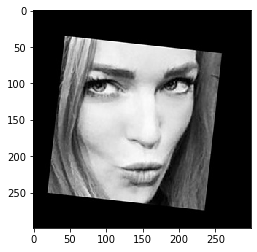

In [11]:
sample = load_image(str(metadata[1000]))
plt.imshow(sample)

<h2>VGG Face Model</h2>

In [12]:
def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

<h2>Creating an Instance of the Model and loading the model with the pretrained weights</h2>

In [13]:
model = vgg_face()
model.load_weights('vgg_face_weights.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


<h2>vgg_face_descriptor</h2>

In [14]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [15]:
#Get Embedding Vector for images ==> (224,224,3) to (2622,)

imgPath = metadata[1000].image_path()
img = load_image(imgPath)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img/255).astype(np.float32)
img = cv2.resize(img, dsize=(224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


<h2>Creating Embedding Vectors for All Images</h2>

In [17]:
embeddings = []
for i in range(len(metadata)):
  imgPath = metadata[i].image_path()
  img = load_image(imgPath)
  try:
    img = (img/255).astype(np.float32)
    img = cv2.resize(img, dsize=(224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  except Exception as exp:
    embedding_vector = np.zeros((2622,))
  
  embeddings.append(embedding_vector)

<h2>Function to calculate distance between given 2 pairs of images</h2>

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [18]:
def distance(emb1, emb2):
  return np.sum(np.square(emb1, emb2))

In [19]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path())); 

Distance Between Images 2 and 3: 0.47794873


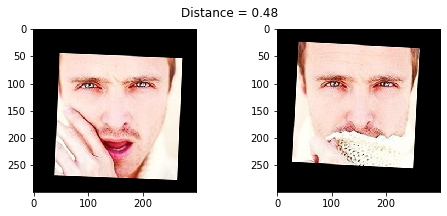

In [20]:
print("Distance Between Images 2 and 3:", distance(embeddings[2], embeddings[3]))
show_pair(2,3)

Distance Between Images 2 and 180: 0.47794873


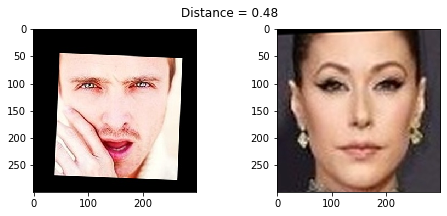

In [21]:
print("Distance Between Images 2 and 180:", distance(embeddings[2], embeddings[180]))
show_pair(2,180)

Distance Between Images 30 and 31: 0.30168992


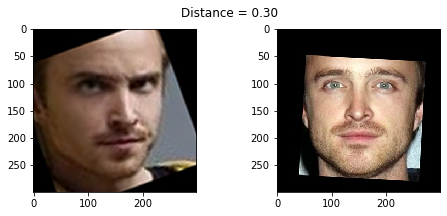

In [22]:
print("Distance Between Images 30 and 31:", distance(embeddings[30], embeddings[31]))
show_pair(30,31)

Distance Between Images 30 and 100: 0.30168992


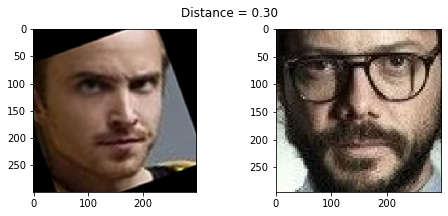

In [23]:
print("Distance Between Images 30 and 100:", distance(embeddings[30], embeddings[100]))
show_pair(30,100)

Distance Between Images 70 and 72: 0.3129886


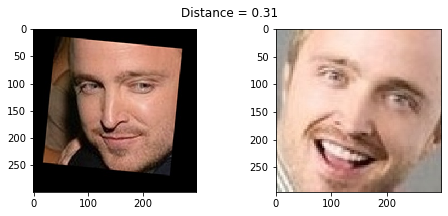

In [24]:
print("Distance Between Images 70 and 72:", distance(embeddings[70], embeddings[72]))
show_pair(70,72)

Distance Between Images 20 and 115: 0.3129886


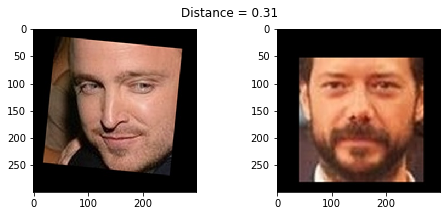

In [25]:
print("Distance Between Images 20 and 115:", distance(embeddings[70], embeddings[115]))
show_pair(70,115)

<h2>Creating Labels</h2>

In [44]:
labels = []
for i in metadata:
    labels.append(str(i).split("\\")[1][5:])
print(len(labels))

4382


<h2>Encoding the labels</h2>

In [46]:
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

<h2>Standardizing the Feature Values</h2>

In [50]:
scaler = StandardScaler()
scaled_vectors = scaler.fit_transform(embeddings)
print(scaled_vectors.shape)

(4382, 2622)


<h2>Dimensionality Reduction with PCA</h2>

In [54]:
pca = PCA(random_state=123)
reduced = pca.fit(scaled_vectors)
features = range(pca.n_components_)

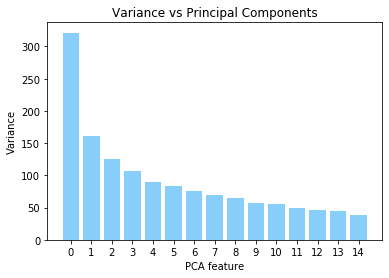

In [58]:
plt.title("Variance vs Principal Components")
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

In [59]:
def pca_transform(n_comp):
    pca = PCA(n_components = n_comp, random_state=123)
    reduced = pca.fit_transform(scaled_vectors)
    print("'Shape of the new Data df: " + str(reduced.shape))
    return reduced

data_reduced = pca_transform(14)

'Shape of the new Data df: (4382, 14)


In [100]:
data_reduced = pd.DataFrame(data_reduced)
data_reduced['labels'] = labels
data_reduced['labels_encoded'] = labels_encoded

In [101]:
data_reduced.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,labels,labels_encoded
0,-19.902023,8.195040,17.164200,10.529058,-9.070442,0.220730,-9.150673,-2.180903,-0.891430,4.319756,9.027622,-9.908405,1.209590,2.091603,Aaron Paul,0
1,-10.184792,20.858389,-8.572562,-11.279860,-8.026578,-0.278169,3.915138,5.109520,3.239768,0.204743,5.317789,-8.199326,4.664449,0.825571,Aaron Paul,0
2,-2.271687,19.688048,-7.277228,-8.086895,-8.653278,1.990311,5.960730,2.785843,-2.094296,0.521180,0.868569,-7.968234,8.299195,3.973759,Aaron Paul,0
3,-3.204496,-38.948424,-19.721598,-17.565373,-3.515249,-0.663173,7.959663,1.606920,-0.902591,-10.967672,-3.402287,-9.644119,0.944548,5.098998,Aaron Paul,0
4,-11.791511,-0.558039,-2.752268,-1.878410,-7.409243,-3.660403,-4.055876,2.187136,4.912610,-0.902920,6.751369,-11.917924,-3.176589,1.788280,Aaron Paul,0


In [106]:
X_train, X_test, y_train, y_test = train_test_split(data_reduced.iloc[:,:14], labels_encoded, test_size=0.3, random_state=123)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (3067, 14)
X_test (1315, 14)
y_train (3067,)
y_test (1315,)


<h2>SVM Classifier</h2>

In [107]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [108]:
pred = svc.predict(X_test)

In [109]:
print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.9330798479087452


<b>The Model is performing at a test accuracy of 93%</b>

<h1>Example Predictions</h1>

<h3>Example 1</h3>

This image is predicted to be: Aaron Paul


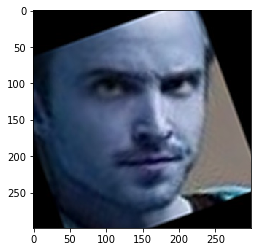

In [127]:
image_num = 30
example_image_path = str(metadata[image_num])
example_image = cv2.imread(example_image_path)
pred = svc.predict(data_reduced.iloc[:,:14])
print("This image is predicted to be:",encoder.inverse_transform(np.array([pred[image_num]]))[0])
plt.imshow(example_image)

<h3>Example 2</h3>

This image is predicted to be: Amaury Nolasco


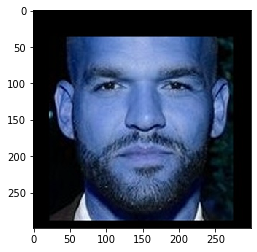

In [128]:
image_num = 300
example_image_path = str(metadata[image_num])
example_image = cv2.imread(example_image_path)
pred = svc.predict(data_reduced.iloc[:,:14])
print("This image is predicted to be:",encoder.inverse_transform(np.array([pred[image_num]]))[0])
plt.imshow(example_image)

<h3>Example 3</h3>

This image is predicted to be: Caity Lotz


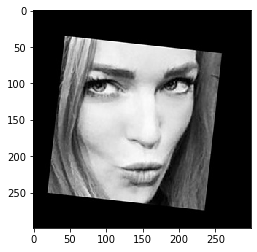

In [129]:
image_num = 1000
example_image_path = str(metadata[image_num])
example_image = cv2.imread(example_image_path)
pred = svc.predict(data_reduced.iloc[:,:14])
print("This image is predicted to be:",encoder.inverse_transform(np.array([pred[image_num]]))[0])
plt.imshow(example_image)

<h3>Example 4</h3>

This image is predicted to be: Dwayne Johnson


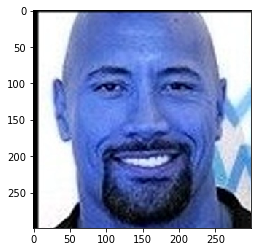

In [130]:
image_num = 2000
example_image_path = str(metadata[image_num])
example_image = cv2.imread(example_image_path)
pred = svc.predict(data_reduced.iloc[:,:14])
print("This image is predicted to be:",encoder.inverse_transform(np.array([pred[image_num]]))[0])
plt.imshow(example_image)

<h3>Example 5</h3>

This image is predicted to be: Jim Parsons


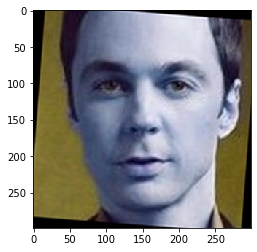

In [132]:
image_num = 3079
example_image_path = str(metadata[image_num])
example_image = cv2.imread(example_image_path)
pred = svc.predict(data_reduced.iloc[:,:14])
print("This image is predicted to be:",encoder.inverse_transform(np.array([pred[image_num]]))[0])
plt.imshow(example_image)

<h3>Example 6</h3>

This image is predicted to be: Cobie Smulders


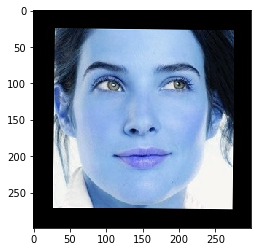

In [151]:
image_num = 1601
example_image_path = str(metadata[image_num])
example_image = cv2.imread(example_image_path)
pred = svc.predict(data_reduced.iloc[:,:14])
print("This image is predicted to be:",encoder.inverse_transform(np.array([pred[image_num]]))[0])
plt.imshow(example_image)

<h3>Example 7</h3>

This image is predicted to be: Jason Momoa


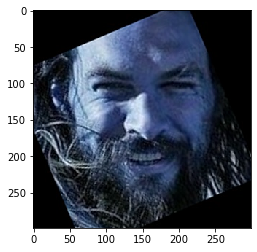

In [142]:
image_num = 2831
example_image_path = str(metadata[image_num])
example_image = cv2.imread(example_image_path)
pred = svc.predict(data_reduced.iloc[:,:14])
print("This image is predicted to be:",encoder.inverse_transform(np.array([pred[image_num]]))[0])
plt.imshow(example_image)

<h3>Example 8</h3>

This image is predicted to be: Henry Cavil


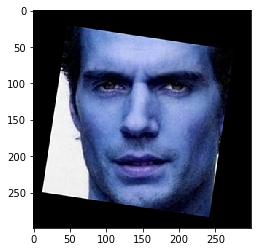

In [138]:
image_num = 2600
example_image_path = str(metadata[image_num])
example_image = cv2.imread(example_image_path)
pred = svc.predict(data_reduced.iloc[:,:14])
print("This image is predicted to be:",encoder.inverse_transform(np.array([pred[image_num]]))[0])
plt.imshow(example_image)

<h3>Example 9</h3>

This image is predicted to be: Amanda Crew


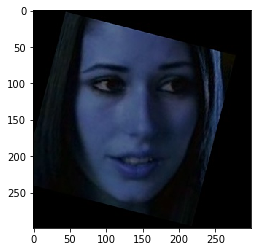

In [136]:
image_num = 200
example_image_path = str(metadata[image_num])
example_image = cv2.imread(example_image_path)
pred = svc.predict(data_reduced.iloc[:,:14])
print("This image is predicted to be:",encoder.inverse_transform(np.array([pred[image_num]]))[0])
plt.imshow(example_image)

<h3>Example 10</h3>

This image is predicted to be: Kit Harington


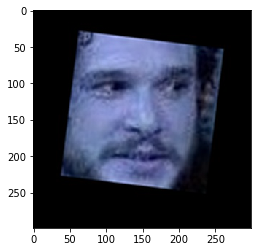

In [135]:
image_num = 3400
example_image_path = str(metadata[image_num])
example_image = cv2.imread(example_image_path)
pred = svc.predict(data_reduced.iloc[:,:14])
print("This image is predicted to be:",encoder.inverse_transform(np.array([pred[image_num]]))[0])
plt.imshow(example_image)